## 591 網路爬蟲

In [11]:
import requests
headers = {
 'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36'   
}
res = requests.get('https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5', headers = headers)
jd = res.json()

## 使用Pandas 整理資料

In [12]:
import pandas
df = pandas.DataFrame(jd['data']['data'])
df.head()

,addInfo,addition2,addition3,addition4,addr_number_name,address,address_img,address_img_title,alley_name,allfloor,...,storeprice,street_name,streetid,type,unit,updatetime,user_id,vipBorder,vipimg,vipstyle
0,,0,0,1,,忠孝東路三段217巷忠孝復..,忠孝復興站忠孝東路三房兩廳華廈附傢俱,忠孝復興站忠孝東路三房兩廳華廈附傢俱,217巷,7,...,0,忠孝東路三段,25636,1,元/月,1500890064,2153882,vipStyle,,isvip
1,,0,0,1,,復興南路一段市民大..,市民大道微風SOGO忠孝東路,市民大道微風SOGO忠孝東路,,7,...,0,復興南路一段,25660,1,元/月,1500973928,2099380,vipStyle,,isvip
2,,0,0,1,,仁愛路三段123巷仁..,仁愛復興南路忠孝SOGO,仁愛復興南路忠孝SOGO,123巷,7,...,0,仁愛路三段,25616,1,元/月,1500972331,2099380,vipStyle,,isvip
3,,0,0,1,,樂業街2房1廳基隆路二段..,2房1廳基隆路二段六张犁站民生國小遼寧夜,2房1廳基隆路二段六张犁站民生國小遼寧夜,,4,...,0,樂業街,25674,1,元/月,1501133737,2099368,vipStyle,,isvip
4,,0,0,1,,四維路52巷大安捷運300公..,大安捷運300公尺全新飯店裝潢2房1廳,大安捷運300公尺全新飯店裝潢2房1廳,52巷,5,...,0,四維路,25619,1,元/月,1500189761,289326,vipStyle,,isvip


## 使用pandas 清理資料

In [13]:
df = df[['address', 'floor', 'allfloor', 'layout', 'area', 'price','browsenum_all']]
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all
0,忠孝東路三段217巷忠孝復..,3,7,3房2廳2衛,39.0,"40,000",780
1,復興南路一段市民大..,4,7,2房1廳1衛,20.0,"32,002",324
2,仁愛路三段123巷仁..,5,7,2房1廳1衛,21.0,"29,036",602
3,樂業街2房1廳基隆路二段..,2,4,2房1廳1衛,20.0,"26,006",53
4,四維路52巷大安捷運300公..,4,5,2房1廳1衛,22.0,"34,000",5932


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
address          30 non-null object
floor            30 non-null int64
allfloor         30 non-null int64
layout           30 non-null object
area             30 non-null float64
price            30 non-null object
browsenum_all    30 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.7+ KB


In [15]:
df[['layout_bedroom', 'layout_livingroom', 'layout_bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [16]:
df['price'] = df['price'].map(lambda e : int(''.join(e.split(','))) )

In [17]:
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
0,忠孝東路三段217巷忠孝復..,3,7,3房2廳2衛,39.0,40000,780,3,2,2
1,復興南路一段市民大..,4,7,2房1廳1衛,20.0,32002,324,2,1,1
2,仁愛路三段123巷仁..,5,7,2房1廳1衛,21.0,29036,602,2,1,1
3,樂業街2房1廳基隆路二段..,2,4,2房1廳1衛,20.0,26006,53,2,1,1
4,四維路52巷大安捷運300公..,4,5,2房1廳1衛,22.0,34000,5932,2,1,1


## 將資料儲存至Excel

In [18]:
df.to_excel('rent591.xlsx')

## 將資料儲存至SQLite

In [19]:
import sqlite3
with sqlite3.connect('renthouse.sqlite') as db:
    df.to_sql('renthouse591', con=db, if_exists='replace')

## 從SQLIte 讀取資料

In [20]:
import sqlite3
with sqlite3.connect('renthouse.sqlite') as db:
    df2 = pandas.read_sql_query('select address, browsenum_all from renthouse591 limit 3', con = db)
df2.head()

,address,browsenum_all
0,忠孝東路三段217巷忠孝復..,780
1,復興南路一段市民大..,324
2,仁愛路三段123巷仁..,602


## 取得敘述性統計

In [24]:
df.describe()

,floor,allfloor,area,price,browsenum_all
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,8.966667,8.733333,35.166667,49724.766667,1349.133333
std,17.773447,4.338547,22.027856,36486.869209,2061.735555
min,2.000000,4.000000,9.700000,16000.000000,53.000000
25%,3.000000,6.250000,21.100000,29500.000000,314.750000
50%,4.000000,7.000000,29.000000,40000.000000,640.000000
75%,7.750000,12.000000,43.075000,49000.000000,1217.000000
max,100.000000,19.000000,105.200000,200000.000000,9649.000000


In [27]:
df.sort_values('price', ascending=False).head(3)

,address,floor,allfloor,layout,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
11,羅斯福路三段可短租◎頂樓..,19,19,3房2廳2衛,103.0,200000,636,3,2,2
24,羅斯福路三段屋主自租~客..,18,19,3房2廳3衛,105.2,115000,1652,3,2,3
22,瑞安街208巷大安森林公園..,3,7,3房2廳2衛,50.0,110000,771,3,2,2


## 搜集591 整層住家資訊

In [28]:
import requests
url = 'https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow={}&totalRows=571'
headers = {
   'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36' 
}
house_ary = []
for i in range(0,21):
    res = requests.get(url.format(i*20) , headers = headers)
    jd = res.json()
    df = pandas.DataFrame(jd['data']['data'])
    df = df[['address', 'floor', 'allfloor', 'layout','area', 'price','browsenum_all']]
    df[['layout_bedroom', 'layout_livingroom', 'layout_bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛', expand=False)
    df['price'] = df['price'].map(lambda e: int(''.join(e.split(','))))
    house_ary.append(df)

In [29]:
df = pandas.concat(house_ary)
df.to_excel('house591.xlsx')

In [30]:
df.count()

address              630
floor                630
allfloor             630
layout               630
area                 630
price                630
browsenum_all        630
layout_bedroom       622
layout_livingroom    622
layout_bathroom      622
dtype: int64

In [31]:
df = pandas.read_excel('house591.xlsx')

In [32]:
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
0,忠孝東路三段217巷忠孝復..,3,7,3房2廳2衛,39.0,40000,781,3.0,2.0,2.0
1,復興南路一段市民大..,4,7,2房1廳1衛,20.0,32002,327,2.0,1.0,1.0
2,仁愛路三段123巷仁..,5,7,2房1廳1衛,21.0,29036,602,2.0,1.0,1.0
3,樂業街2房1廳基隆路二段..,2,4,2房1廳1衛,20.0,26006,55,2.0,1.0,1.0
4,四維路52巷大安捷運300公..,4,5,2房1廳1衛,22.0,34000,5934,2.0,1.0,1.0


## 畫出資料散佈圖 

Populating the interactive namespace from numpy and matplotlib


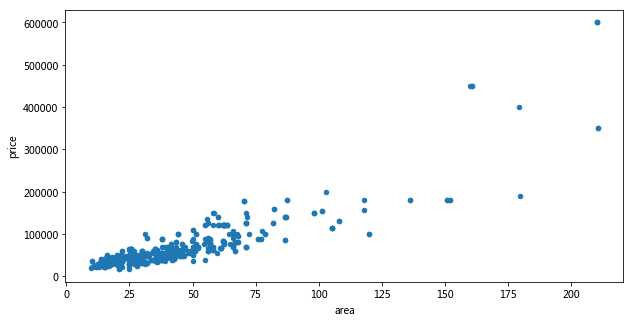

In [33]:
% pylab inline
df[['price', 'area']].plot(kind='scatter', x = 'area', y = 'price', figsize=[10,5])

## 建立迴歸模型

In [34]:
from sklearn.linear_model import LinearRegression
y= df['price']
X = df[['area']]
regr = LinearRegression()
regr.fit(X,y)

print('Coefficient:{}'.format(regr.coef_) )
print('Intercept:{}'.format(regr.intercept_) )

Coefficient:[ 1777.03281824]
Intercept:-9918.332416423029


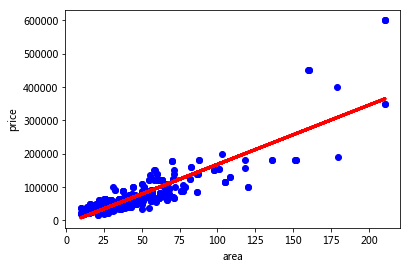

In [35]:
plt.scatter(X,y, color="blue")
plt.plot(X, regr.predict(X), linewidth = 3, color = "red")
plt.xlabel('area')
plt.ylabel('price')